# Experiment Analysis Summary: Model Accuracy and Robustness

This notebook provides a comprehensive analysis of federated learning experiments focusing on:
- Model accuracy across different configurations
- Robustness metrics under poisoning attacks
- Performance comparisons between model types and datasets

All figures follow IEEE journal standards (600 DPI, 3.5" and 7.16" widths).

In [155]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# IEEE journal figure settings
IEEE_SINGLE_COLUMN = 3.5  # inches
IEEE_DOUBLE_COLUMN = 7.16  # inches
IEEE_DPI = 600

# Set style for publication-quality figures
plt.style.use('seaborn-v0_8-paper')
sns.set_palette("husl")

# Font settings for IEEE
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.size': 12,
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.titlesize': 14,
    'lines.linewidth': 1.0,
    'lines.markersize': 4,
})

# Create output directory
output_dir = Path('final_figure')
output_dir.mkdir(exist_ok=True)

print(f"Output directory: {output_dir.absolute()}")
print(f"IEEE standards: {IEEE_DPI} DPI, {IEEE_SINGLE_COLUMN}\" (single) and {IEEE_DOUBLE_COLUMN}\" (double) column widths")

Output directory: c:\github\poisoning_attack_analysis\final_figure
IEEE standards: 600 DPI, 3.5" (single) and 7.16" (double) column widths


In [156]:
# Load the experimental results
df = pd.read_csv('final_results.csv')

print(f"Total experiments: {len(df)}")
print(f"\nDatasets: {df['dataset'].unique()}")
print(f"Model types: {df['model_type'].unique()}")
print(f"Phases: {df['phase'].unique()}")
print(f"\nPoison ratios: {sorted(df['poison_ratio'].unique())}")
print(f"Width factors: {sorted(df['width_factor'].unique())}")
print(f"Depths: {sorted(df['depth'].unique())}")

# Display first few rows
df.head()

Total experiments: 1520

Datasets: ['mnist' 'cifar10']
Model types: ['lr' 'cnn']
Phases: ['exp1_vary_width' 'exp2_mechanism_analysis' 'exp3_attack_types'
 'exp4_iid_vs_noniid' 'exp5_defense_comparison']

Poison ratios: [np.float64(0.0), np.float64(0.3), np.float64(0.5)]
Width factors: [np.int64(1), np.int64(4), np.int64(16), np.int64(64)]
Depths: [np.int64(1), np.int64(4), np.int64(16), np.int64(64)]


,phase,signature,dataset,model_type,width_factor,depth,poison_ratio,poison_type,alpha,data_ordering,...,std_test_acc,mean_test_loss,std_test_loss,mean_val_acc,std_val_acc,mean_val_loss,std_val_loss,num_parameters,best_epoch,seed
0,exp1_vary_width,mnist|lr|1|4|0.0|label_flip|100.0|shuffle|feda...,mnist,lr,1,4,0.0,label_flip,100.0,shuffle,...,0.0,2.301010,0.0,0.111000,0.0,2.300842,0.0,819,1,42
1,exp1_vary_width,mnist|lr|1|4|0.3|label_flip|100.0|shuffle|feda...,mnist,lr,1,4,0.3,label_flip,100.0,shuffle,...,0.0,1.553228,0.0,0.419667,0.0,1.570107,0.0,819,34,42
2,exp1_vary_width,mnist|lr|1|1|0.3|label_flip|100.0|shuffle|feda...,mnist,lr,1,1,0.3,label_flip,100.0,shuffle,...,0.0,1.516175,0.0,0.422500,0.0,1.492613,0.0,807,74,42
3,exp1_vary_width,mnist|lr|1|1|0.5|label_flip|100.0|shuffle|feda...,mnist,lr,1,1,0.5,label_flip,100.0,shuffle,...,0.0,1.529775,0.0,0.400000,0.0,1.515766,0.0,807,68,42
4,exp1_vary_width,mnist|lr|1|1|0.0|label_flip|100.0|shuffle|feda...,mnist,lr,1,1,0.0,label_flip,100.0,shuffle,...,0.0,1.502926,0.0,0.453500,0.0,1.467227,0.0,807,100,42


In [157]:
def save_ieee_figure(fig, filename, width=IEEE_DOUBLE_COLUMN):
    """Save figure in both single and double column IEEE formats"""
    # Calculate height to maintain aspect ratio
    figsize = fig.get_size_inches()
    aspect_ratio = figsize[1] / figsize[0]
    height = width * aspect_ratio
    fig.set_size_inches(width, height)

    
    if width == IEEE_DOUBLE_COLUMN:
        # save double column
        fig.savefig(output_dir / f"{filename}_double.png", dpi=IEEE_DPI, bbox_inches='tight', pad_inches=0.01)
    else:
        # Save single column version
        fig.savefig(output_dir / f"{filename}_single.png", dpi=IEEE_DPI, bbox_inches='tight', pad_inches=0.01)
    
    # print(f"Saved: {filename} (single: {IEEE_SINGLE_COLUMN}\" and double: {IEEE_DOUBLE_COLUMN}\")")

## exp1_vary_width

### 1.1 exp1_fix_depth

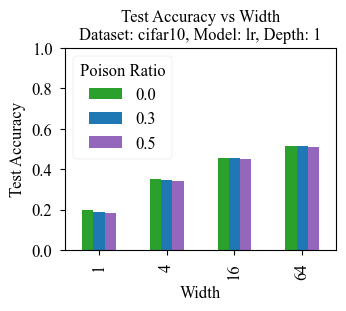

    width_factor  poison_ratio  mean_test_acc       std  qty
0              1           0.0        0.19662  0.001420    5
1              1           0.3        0.18992  0.003348    5
2              1           0.5        0.18532  0.002940    5
3              4           0.0        0.35130  0.002365    5
4              4           0.3        0.34472  0.004851    5
5              4           0.5        0.34140  0.003430    5
6             16           0.0        0.45690  0.004583    5
7             16           0.3        0.45360  0.005001    5
8             16           0.5        0.45134  0.003174    5
9             64           0.0        0.51520  0.004875    5
10            64           0.3        0.51242  0.007344    5
11            64           0.5        0.51032  0.005911    5


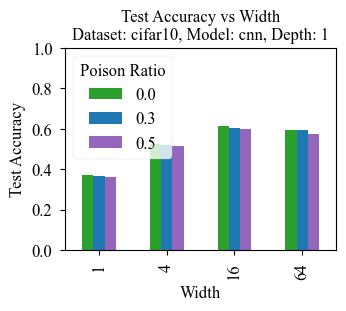

    width_factor  poison_ratio  mean_test_acc       std  qty
0              1           0.0        0.36962  0.013937    5
1              1           0.3        0.36554  0.012748    5
2              1           0.5        0.36288  0.012503    5
3              4           0.0        0.52378  0.010302    5
4              4           0.3        0.51768  0.008605    5
5              4           0.5        0.51384  0.007970    5
6             16           0.0        0.61226  0.006805    5
7             16           0.3        0.60554  0.006207    5
8             16           0.5        0.59712  0.004750    5
9             64           0.0        0.59264  0.005435    5
10            64           0.3        0.59356  0.005112    5
11            64           0.5        0.57224  0.007784    5


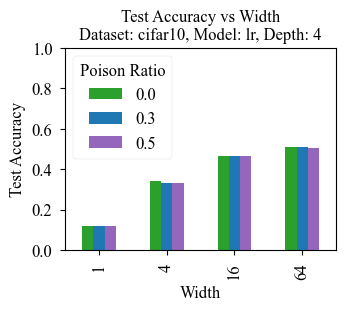

    width_factor  poison_ratio  mean_test_acc       std  qty
0              1           0.0        0.11800  0.040249    5
1              1           0.3        0.11804  0.040339    5
2              1           0.5        0.11812  0.040518    5
3              4           0.0        0.33980  0.019072    5
4              4           0.3        0.33076  0.025124    5
5              4           0.5        0.33036  0.028343    5
6             16           0.0        0.46638  0.008314    5
7             16           0.3        0.46668  0.001504    5
8             16           0.5        0.46438  0.005997    5
9             64           0.0        0.51058  0.006628    5
10            64           0.3        0.50950  0.007563    5
11            64           0.5        0.50542  0.007318    5


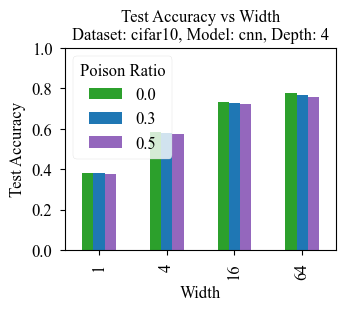

    width_factor  poison_ratio  mean_test_acc       std  qty
0              1           0.0        0.38208  0.019141    5
1              1           0.3        0.38144  0.017418    5
2              1           0.5        0.37762  0.014581    5
3              4           0.0        0.58502  0.006927    5
4              4           0.3        0.58064  0.010693    5
5              4           0.5        0.57582  0.007935    5
6             16           0.0        0.73282  0.004143    5
7             16           0.3        0.72622  0.003591    5
8             16           0.5        0.72378  0.005954    5
9             64           0.0        0.77812  0.003347    5
10            64           0.3        0.76606  0.005026    5
11            64           0.5        0.75840  0.004264    5


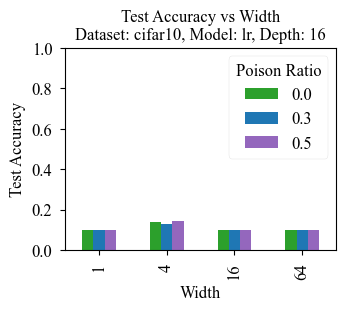

    width_factor  poison_ratio  mean_test_acc       std  qty
0              1           0.0        0.10000  0.000000    5
1              1           0.3        0.10000  0.000000    5
2              1           0.5        0.10000  0.000000    5
3              4           0.0        0.13878  0.086715    5
4              4           0.3        0.12942  0.065785    5
5              4           0.5        0.14280  0.095704    5
6             16           0.0        0.10000  0.000000    5
7             16           0.3        0.10000  0.000000    5
8             16           0.5        0.10000  0.000000    5
9             64           0.0        0.10000  0.000000    5
10            64           0.3        0.10000  0.000000    5
11            64           0.5        0.10000  0.000000    5


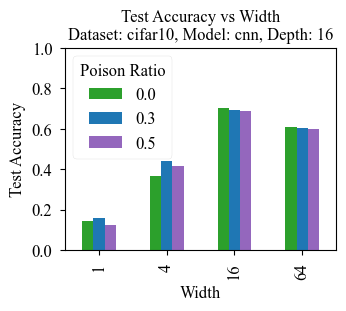

    width_factor  poison_ratio  mean_test_acc       std  qty
0              1           0.0        0.14608  0.032314    5
1              1           0.3        0.16060  0.046020    5
2              1           0.5        0.12174  0.032617    5
3              4           0.0        0.36684  0.149589    5
4              4           0.3        0.43908  0.040893    5
5              4           0.5        0.41480  0.037805    5
6             16           0.0        0.70422  0.009749    5
7             16           0.3        0.69198  0.005336    5
8             16           0.5        0.68952  0.013675    5
9             64           0.0        0.61004  0.009330    5
10            64           0.3        0.60250  0.009099    5
11            64           0.5        0.60110  0.006300    5


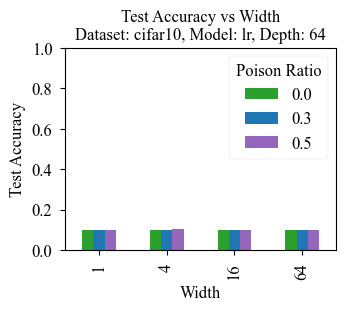

    width_factor  poison_ratio  mean_test_acc       std  qty
0              1           0.0        0.10000  0.000000    5
1              1           0.3        0.10000  0.000000    5
2              1           0.5        0.10000  0.000000    5
3              4           0.0        0.10008  0.000179    5
4              4           0.3        0.10050  0.001118    5
5              4           0.5        0.10278  0.006216    5
6             16           0.0        0.10000  0.000000    5
7             16           0.3        0.10000  0.000000    5
8             16           0.5        0.10000  0.000000    5
9             64           0.0        0.10000  0.000000    5
10            64           0.3        0.10000  0.000000    5
11            64           0.5        0.10000  0.000000    5


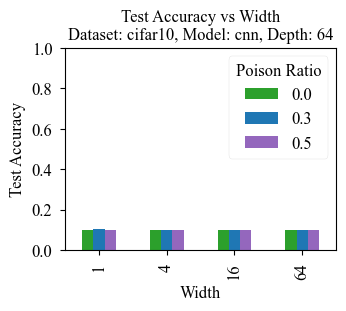

    width_factor  poison_ratio  mean_test_acc       std  qty
0              1           0.0        0.10034  0.000760    5
1              1           0.3        0.10502  0.011225    5
2              1           0.5        0.10000  0.000000    5
3              4           0.0        0.09898  0.002281    5
4              4           0.3        0.09994  0.000134    5
5              4           0.5        0.10008  0.000179    5
6             16           0.0        0.10000  0.000000    5
7             16           0.3        0.10000  0.000000    5
8             16           0.5        0.10000  0.000000    5
9             64           0.0        0.10000  0.000000    5
10            64           0.3        0.10000  0.000000    5
11            64           0.5        0.10000  0.000000    5


In [158]:
dataset = 'cifar10'
for depth in [1, 4, 16, 64]:
    for model_type in ['lr', 'cnn']:
        exp1_data = df[df['phase'] == 'exp1_vary_width'].copy()
        exp1_data = exp1_data[exp1_data['dataset'] == dataset]
        
        exp1_data = exp1_data[exp1_data['model_type'] == model_type]
        exp1_data = exp1_data[exp1_data['depth'] == depth]
    
        # mean
        mean_test_acc = exp1_data.groupby(['width_factor', 'poison_ratio'])['mean_test_acc'].mean().reset_index()
        mean_test_acc_pivot = mean_test_acc.pivot(index='width_factor', columns='poison_ratio', values='mean_test_acc')
        # std
        std_test_acc = exp1_data.groupby(['width_factor', 'poison_ratio'])['mean_test_acc'].std().reset_index()
        std_test_acc.columns = ['width_factor', 'poison_ratio', 'std']
        mean_std_test_acc = mean_test_acc.merge(std_test_acc, on=['width_factor', 'poison_ratio'])   
        # qty
        count_test_acc = exp1_data.groupby(['width_factor', 'poison_ratio'])['mean_test_acc'].count().reset_index()
        count_test_acc.columns = ['width_factor', 'poison_ratio', 'qty']
        mean_std_qty_test_acc = mean_std_test_acc.merge(count_test_acc, on=['width_factor', 'poison_ratio'])   

        # plot mean_test_acc avg vs fix width 1,4,16,64, color by poison_ratio, save figure Double Column IEEE Format
        colors = ['tab:green', 'tab:blue', 'tab:purple', 'tab:orange', 'tab:red']
        mean_test_acc_pivot.plot(kind='bar', figsize=(8, 6), color=colors)
        plt.ylim(0, 1)
        plt.title(f'Test Accuracy vs Width\nDataset: {dataset}, Model: {model_type}, Depth: {depth}')
        plt.xlabel('Width')
        plt.ylabel('Test Accuracy')
        plt.legend(title='Poison Ratio')
        save_ieee_figure(plt.gcf(), 'exp1_vary_width_test_acc_model_{}_dataset_{}_depth_{}'.format(model_type, dataset, depth), width=IEEE_SINGLE_COLUMN)
        plt.show()

        # table mean_test_acc avg vs fix width 1,4,16,64, color by poison_ratio and qty  
        print(mean_std_qty_test_acc)



### 1.2 exp1_fix_width

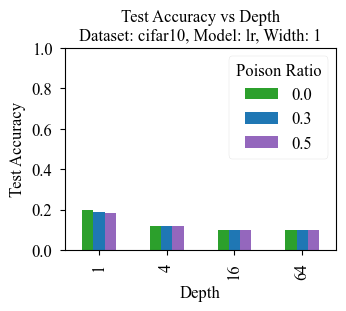

    depth  poison_ratio  mean_test_acc       std  qty
0       1           0.0        0.19662  0.001420    5
1       1           0.3        0.18992  0.003348    5
2       1           0.5        0.18532  0.002940    5
3       4           0.0        0.11800  0.040249    5
4       4           0.3        0.11804  0.040339    5
5       4           0.5        0.11812  0.040518    5
6      16           0.0        0.10000  0.000000    5
7      16           0.3        0.10000  0.000000    5
8      16           0.5        0.10000  0.000000    5
9      64           0.0        0.10000  0.000000    5
10     64           0.3        0.10000  0.000000    5
11     64           0.5        0.10000  0.000000    5


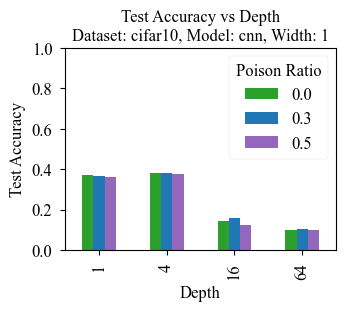

    depth  poison_ratio  mean_test_acc       std  qty
0       1           0.0        0.36962  0.013937    5
1       1           0.3        0.36554  0.012748    5
2       1           0.5        0.36288  0.012503    5
3       4           0.0        0.38208  0.019141    5
4       4           0.3        0.38144  0.017418    5
5       4           0.5        0.37762  0.014581    5
6      16           0.0        0.14608  0.032314    5
7      16           0.3        0.16060  0.046020    5
8      16           0.5        0.12174  0.032617    5
9      64           0.0        0.10034  0.000760    5
10     64           0.3        0.10502  0.011225    5
11     64           0.5        0.10000  0.000000    5


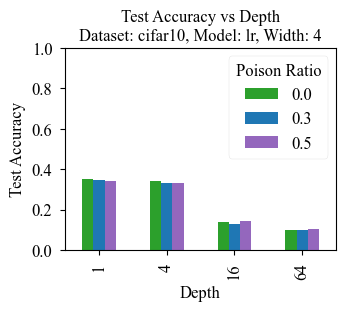

    depth  poison_ratio  mean_test_acc       std  qty
0       1           0.0        0.35130  0.002365    5
1       1           0.3        0.34472  0.004851    5
2       1           0.5        0.34140  0.003430    5
3       4           0.0        0.33980  0.019072    5
4       4           0.3        0.33076  0.025124    5
5       4           0.5        0.33036  0.028343    5
6      16           0.0        0.13878  0.086715    5
7      16           0.3        0.12942  0.065785    5
8      16           0.5        0.14280  0.095704    5
9      64           0.0        0.10008  0.000179    5
10     64           0.3        0.10050  0.001118    5
11     64           0.5        0.10278  0.006216    5


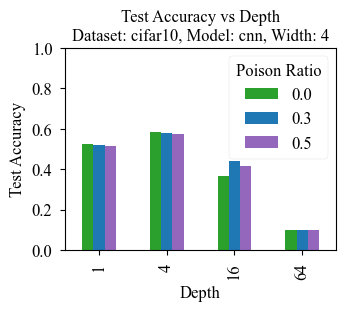

    depth  poison_ratio  mean_test_acc       std  qty
0       1           0.0        0.52378  0.010302    5
1       1           0.3        0.51768  0.008605    5
2       1           0.5        0.51384  0.007970    5
3       4           0.0        0.58502  0.006927    5
4       4           0.3        0.58064  0.010693    5
5       4           0.5        0.57582  0.007935    5
6      16           0.0        0.36684  0.149589    5
7      16           0.3        0.43908  0.040893    5
8      16           0.5        0.41480  0.037805    5
9      64           0.0        0.09898  0.002281    5
10     64           0.3        0.09994  0.000134    5
11     64           0.5        0.10008  0.000179    5


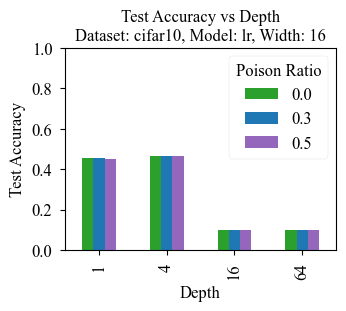

    depth  poison_ratio  mean_test_acc       std  qty
0       1           0.0        0.45690  0.004583    5
1       1           0.3        0.45360  0.005001    5
2       1           0.5        0.45134  0.003174    5
3       4           0.0        0.46638  0.008314    5
4       4           0.3        0.46668  0.001504    5
5       4           0.5        0.46438  0.005997    5
6      16           0.0        0.10000  0.000000    5
7      16           0.3        0.10000  0.000000    5
8      16           0.5        0.10000  0.000000    5
9      64           0.0        0.10000  0.000000    5
10     64           0.3        0.10000  0.000000    5
11     64           0.5        0.10000  0.000000    5


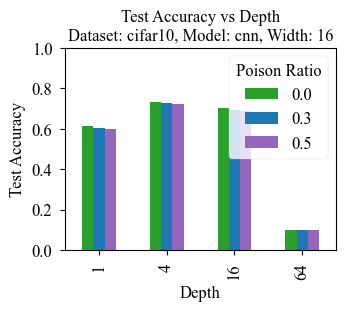

    depth  poison_ratio  mean_test_acc       std  qty
0       1           0.0        0.61226  0.006805    5
1       1           0.3        0.60554  0.006207    5
2       1           0.5        0.59712  0.004750    5
3       4           0.0        0.73282  0.004143    5
4       4           0.3        0.72622  0.003591    5
5       4           0.5        0.72378  0.005954    5
6      16           0.0        0.70422  0.009749    5
7      16           0.3        0.69198  0.005336    5
8      16           0.5        0.68952  0.013675    5
9      64           0.0        0.10000  0.000000    5
10     64           0.3        0.10000  0.000000    5
11     64           0.5        0.10000  0.000000    5


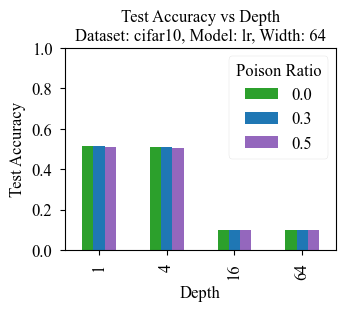

    depth  poison_ratio  mean_test_acc       std  qty
0       1           0.0        0.51520  0.004875    5
1       1           0.3        0.51242  0.007344    5
2       1           0.5        0.51032  0.005911    5
3       4           0.0        0.51058  0.006628    5
4       4           0.3        0.50950  0.007563    5
5       4           0.5        0.50542  0.007318    5
6      16           0.0        0.10000  0.000000    5
7      16           0.3        0.10000  0.000000    5
8      16           0.5        0.10000  0.000000    5
9      64           0.0        0.10000  0.000000    5
10     64           0.3        0.10000  0.000000    5
11     64           0.5        0.10000  0.000000    5


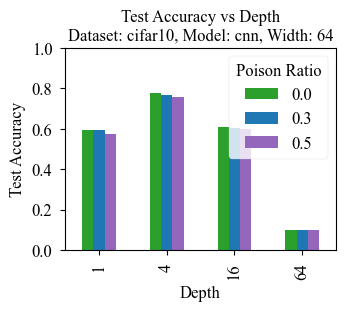

    depth  poison_ratio  mean_test_acc       std  qty
0       1           0.0        0.59264  0.005435    5
1       1           0.3        0.59356  0.005112    5
2       1           0.5        0.57224  0.007784    5
3       4           0.0        0.77812  0.003347    5
4       4           0.3        0.76606  0.005026    5
5       4           0.5        0.75840  0.004264    5
6      16           0.0        0.61004  0.009330    5
7      16           0.3        0.60250  0.009099    5
8      16           0.5        0.60110  0.006300    5
9      64           0.0        0.10000  0.000000    5
10     64           0.3        0.10000  0.000000    5
11     64           0.5        0.10000  0.000000    5


In [159]:
dataset = 'cifar10'

for width_factor in [1, 4, 16, 64]:
    for model_type in ['lr', 'cnn']:
        exp1_data = df[df['phase'] == 'exp1_vary_width'].copy()
        exp1_data = exp1_data[exp1_data['dataset'] == dataset]
        
        exp1_data = exp1_data[exp1_data['model_type'] == model_type]
        exp1_data = exp1_data[exp1_data['width_factor'] == width_factor]
    
        # mean
        mean_test_acc = exp1_data.groupby(['depth', 'poison_ratio'])['mean_test_acc'].mean().reset_index()
        mean_test_acc_pivot = mean_test_acc.pivot(index='depth', columns='poison_ratio', values='mean_test_acc')
        # std
        std_test_acc = exp1_data.groupby(['depth', 'poison_ratio'])['mean_test_acc'].std().reset_index()
        std_test_acc.columns = ['depth', 'poison_ratio', 'std']
        mean_std_test_acc = mean_test_acc.merge(std_test_acc, on=['depth', 'poison_ratio'])   
        # qty
        count_test_acc = exp1_data.groupby(['depth', 'poison_ratio'])['mean_test_acc'].count().reset_index()
        count_test_acc.columns = ['depth', 'poison_ratio', 'qty']
        mean_std_qty_test_acc = mean_std_test_acc.merge(count_test_acc, on=['depth', 'poison_ratio'])   

        # plot mean_test_acc avg vs fix depth 1,4,16,64, color by poison_ratio, save figure Double Column IEEE Format
        colors = ['tab:green', 'tab:blue', 'tab:purple', 'tab:orange', 'tab:red']   
        mean_test_acc_pivot.plot(kind='bar', figsize=(8, 6), color=colors)
        plt.ylim(0, 1)
        plt.title(f'Test Accuracy vs Depth\nDataset: {dataset}, Model: {model_type}, Width: {width_factor}')
        plt.xlabel('Depth')
        plt.ylabel('Test Accuracy')
        plt.legend(title='Poison Ratio')
        save_ieee_figure(plt.gcf(), 'exp1_vary_detph_test_acc_model_{}_width_{}_dataset_{}'.format(model_type, width_factor, dataset), width=IEEE_SINGLE_COLUMN)
        plt.show()

        # table mean_test_acc avg vs fix depth 1,4,16,64, color by poison_ratio and qty  
        print(mean_std_qty_test_acc)



### 1.3 exp1_vary_width_depth acc

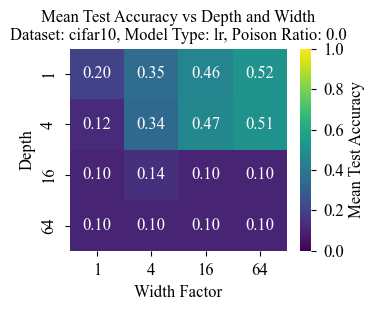

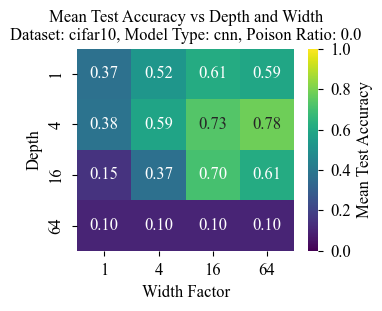

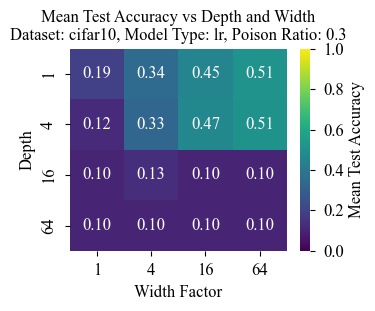

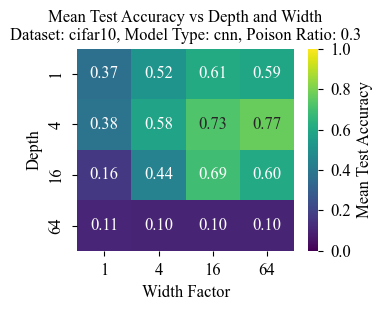

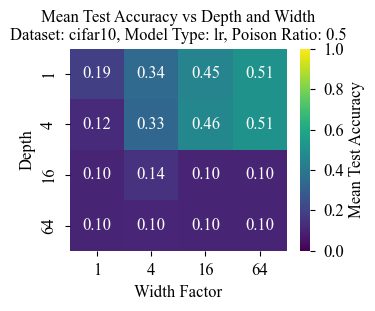

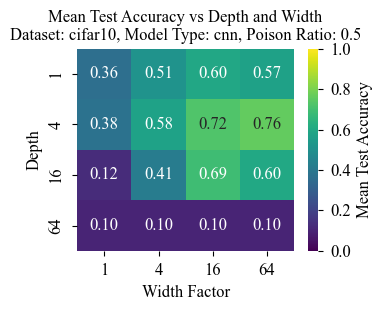

In [160]:
dataset = 'cifar10'

for poison_ratio in [0.0, 0.3, 0.5]:
    for model_type in ['lr', 'cnn']:
        exp1_data = df[df['phase'] == 'exp1_vary_width'].copy()
        exp1_data = exp1_data[exp1_data['dataset'] == dataset]
        exp1_data = exp1_data[exp1_data['model_type'] == model_type]
        exp1_data = exp1_data[exp1_data['poison_ratio'] == poison_ratio]
        
        # plot matrix heatmap of mean_test_acc vs fix depth 1,4,16,64 vs fix width 1,4,16,64
        fig = plt.figure(figsize=(8, 6))
        sns.heatmap(exp1_data.pivot_table(index='depth', columns='width_factor', values='mean_test_acc'), 
            cmap='viridis', vmin=0.0, vmax=1.0, 
            annot=True, fmt='.2f', cbar_kws={'label': 'Mean Test Accuracy'})
        plt.title(f'Mean Test Accuracy vs Depth and Width\nDataset: {dataset}, Model Type: {model_type}, Poison Ratio: {poison_ratio}')
        plt.xlabel('Width Factor')
        plt.ylabel('Depth')
        save_ieee_figure(plt.gcf(), f'exp1_vary_width_depth_test_acc_{poison_ratio}_{model_type}', width=IEEE_SINGLE_COLUMN)
        plt.show()


### 1.4 exp1_vary_width_depth impact

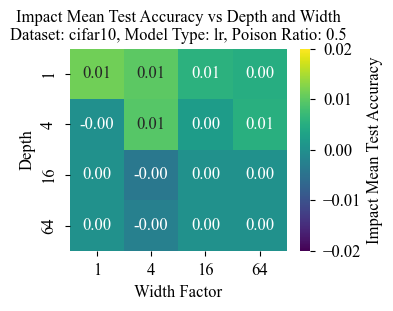

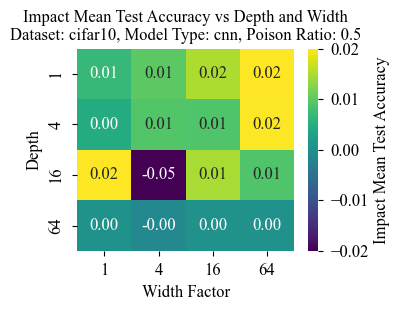

In [161]:
dataset = 'cifar10'

for model_type in ['lr', 'cnn']:
    exp1_data = df[df['phase'] == 'exp1_vary_width'].copy()
    exp1_data = exp1_data[exp1_data['dataset'] == dataset]
    exp1_data = exp1_data[exp1_data['model_type'] == model_type]
    exp1_data_pr00 = exp1_data[exp1_data['poison_ratio'] == 0.0][['depth', 'width_factor', 'mean_test_acc']]
    exp1_data_pr05 = exp1_data[exp1_data['poison_ratio'] == 0.5][['depth', 'width_factor', 'mean_test_acc']]
    exp1_data_pr05.columns = ['depth', 'width_factor', 'attack_mean_test_acc']  
    exp_data_attack = exp1_data_pr00.merge(exp1_data_pr05, on=['depth', 'width_factor'])
    exp_data_attack['impact_mean_test_acc'] = exp_data_attack['mean_test_acc'] - exp_data_attack['attack_mean_test_acc']
    
    
    # plot matrix heatmap of impact_mean_test_acc vs fix depth 1,4,16,64 vs fix width 1,4,16,64
    fig = plt.figure(figsize=(8, 6))
    # cmap invert viridis
    sns.heatmap(exp_data_attack.pivot_table(index='depth', columns='width_factor', values='impact_mean_test_acc'), 
        cmap='viridis', vmin=-0.02, vmax=0.02, 
        annot=True, fmt='.2f', cbar_kws={'label': 'Impact Mean Test Accuracy'})
    plt.title(f'Impact Mean Test Accuracy vs Depth and Width\nDataset: {dataset}, Model Type: {model_type}, Poison Ratio: 0.5')
    plt.xlabel('Width Factor')
    plt.ylabel('Depth')
    save_ieee_figure(plt.gcf(), f'exp1_vary_width_depth_test_acc_Impact_0.5_{model_type}', width=IEEE_SINGLE_COLUMN)
    plt.show()


# exp2_mechanism_analysis

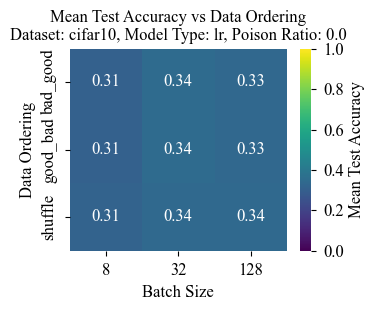

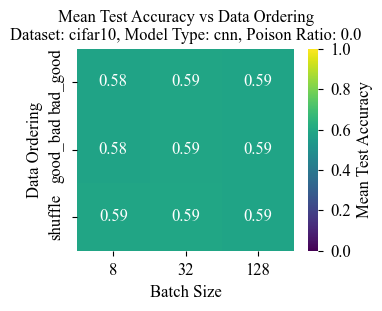

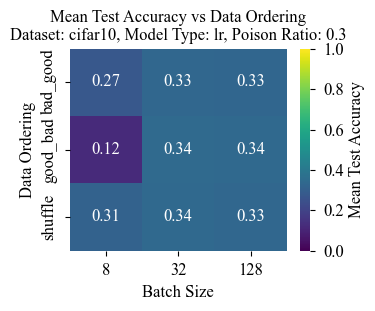

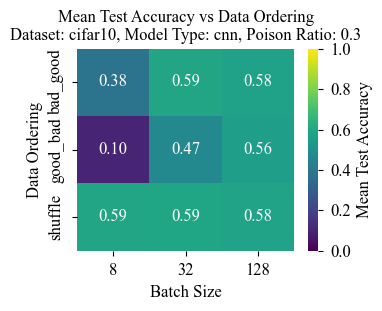

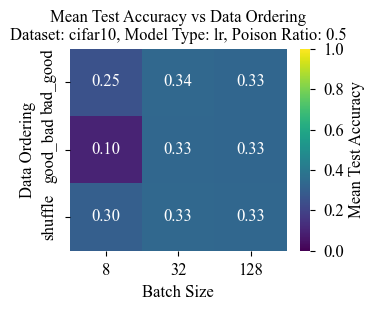

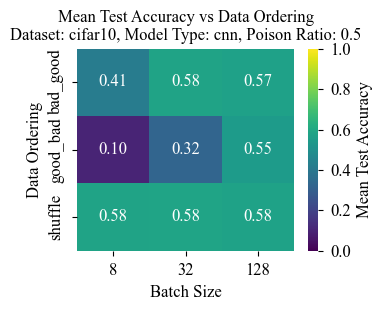

In [162]:
dataset = 'cifar10'

for poison_ratio in [0.0, 0.3, 0.5]:
    for model_type in ['lr', 'cnn']:
        exp2_data = df[df['phase'] == 'exp2_mechanism_analysis'].copy()
        exp2_data = exp2_data[exp2_data['dataset'] == dataset]
        exp2_data = exp2_data[exp2_data['model_type'] == model_type]
        exp2_data = exp2_data[exp2_data['poison_ratio'] == poison_ratio]
        
        # plot matrix heatmap of mean_test_acc vs fix depth 1,4,16,64 vs fix width 1,4,16,64
        fig = plt.figure(figsize=(8, 6))
        sns.heatmap(exp2_data.pivot_table(index='data_ordering', columns='batch_size', values='mean_test_acc'), 
            cmap='viridis', vmin=0.0, vmax=1.0, 
            annot=True, fmt='.2f', cbar_kws={'label': 'Mean Test Accuracy'})
        plt.title(f'Mean Test Accuracy vs Data Ordering\nDataset: {dataset}, Model Type: {model_type}, Poison Ratio: {poison_ratio}')
        plt.xlabel('Batch Size')
        plt.ylabel('Data Ordering')
        save_ieee_figure(plt.gcf(), f'exp2_vary_data_ordering_test_acc_{poison_ratio}_{model_type}', width=IEEE_SINGLE_COLUMN)
        plt.show()


## exp3_attack_types

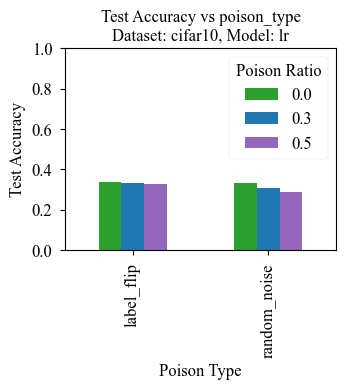

    poison_type  poison_ratio  mean_test_acc       std  qty
0    label_flip           0.0        0.33980  0.019072    5
1    label_flip           0.3        0.33076  0.025124    5
2    label_flip           0.5        0.33036  0.028343    5
3  random_noise           0.0        0.33410  0.021463    5
4  random_noise           0.3        0.31030  0.015109    5
5  random_noise           0.5        0.28604  0.018063    5


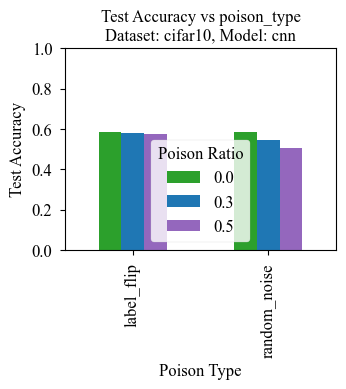

    poison_type  poison_ratio  mean_test_acc       std  qty
0    label_flip           0.0        0.58502  0.006927    5
1    label_flip           0.3        0.58064  0.010693    5
2    label_flip           0.5        0.57582  0.007935    5
3  random_noise           0.0        0.58502  0.006927    5
4  random_noise           0.3        0.54768  0.017105    5
5  random_noise           0.5        0.50636  0.010865    5


In [163]:
dataset = 'cifar10'

for model_type in ['lr', 'cnn']:
    exp3_data = df[df['phase'] == 'exp3_attack_types'].copy()
    exp3_data = exp3_data[exp3_data['dataset'] == dataset]
    
    exp3_data = exp3_data[exp3_data['model_type'] == model_type]

    # mean
    mean_test_acc = exp3_data.groupby(['poison_type', 'poison_ratio'])['mean_test_acc'].mean().reset_index()
    mean_test_acc_pivot = mean_test_acc.pivot(index='poison_type', columns='poison_ratio', values='mean_test_acc')
    # std
    std_test_acc = exp3_data.groupby(['poison_type', 'poison_ratio'])['mean_test_acc'].std().reset_index()
    std_test_acc.columns = ['poison_type', 'poison_ratio', 'std']
    mean_std_test_acc = mean_test_acc.merge(std_test_acc, on=['poison_type', 'poison_ratio'])   
    # qty
    count_test_acc = exp3_data.groupby(['poison_type', 'poison_ratio'])['mean_test_acc'].count().reset_index()
    count_test_acc.columns = ['poison_type', 'poison_ratio', 'qty']
    mean_std_qty_test_acc = mean_std_test_acc.merge(count_test_acc, on=['poison_type', 'poison_ratio'])   

    # plot mean_test_acc avg vs fix width 1,4,16,64, color by poison_ratio, save figure Double Column IEEE Format
    colors = ['tab:green', 'tab:blue', 'tab:purple']
    mean_test_acc_pivot.plot(kind='bar', figsize=(8, 6), color=colors)
    plt.ylim(0, 1)
    plt.title(f'Test Accuracy vs poison_type\nDataset: {dataset}, Model: {model_type}')
    plt.xlabel('Poison Type')
    plt.ylabel('Test Accuracy')
    plt.legend(title='Poison Ratio')
    save_ieee_figure(plt.gcf(), 'exp3_attack_types_test_acc_model_{}_dataset_{}'.format(model_type, dataset), width=IEEE_SINGLE_COLUMN)
    plt.show()

    # table mean_test_acc avg vs fix width 1,4,16,64, color by poison_ratio and qty  
    print(mean_std_qty_test_acc)



## exp4_iid_vs_noniid

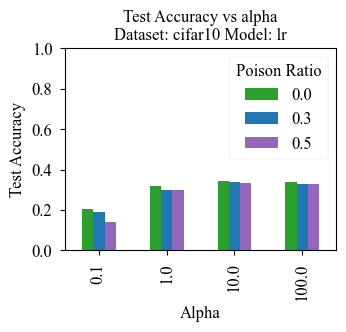

    alpha  poison_ratio  mean_test_acc       std  qty
0     0.1           0.0        0.20336  0.030289    5
1     0.1           0.3        0.19260  0.018076    5
2     0.1           0.5        0.14266  0.023909    5
3     1.0           0.0        0.31772  0.016934    5
4     1.0           0.3        0.30052  0.017131    5
5     1.0           0.5        0.29896  0.019110    5
6    10.0           0.0        0.34196  0.017667    5
7    10.0           0.3        0.33816  0.019644    5
8    10.0           0.5        0.33238  0.012456    5
9   100.0           0.0        0.33980  0.019072    5
10  100.0           0.3        0.33076  0.025124    5
11  100.0           0.5        0.33036  0.028343    5


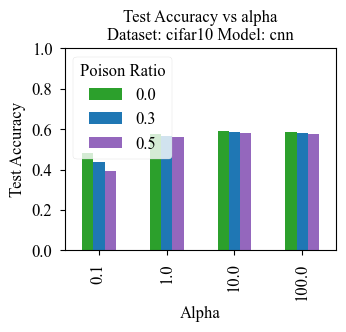

    alpha  poison_ratio  mean_test_acc       std  qty
0     0.1           0.0        0.48054  0.014581    5
1     0.1           0.3        0.43888  0.013169    5
2     0.1           0.5        0.39408  0.025033    5
3     1.0           0.0        0.57632  0.006861    5
4     1.0           0.3        0.56402  0.008370    5
5     1.0           0.5        0.56164  0.009085    5
6    10.0           0.0        0.58878  0.009626    5
7    10.0           0.3        0.58754  0.008930    5
8    10.0           0.5        0.58224  0.011019    5
9   100.0           0.0        0.58502  0.006927    5
10  100.0           0.3        0.58064  0.010693    5
11  100.0           0.5        0.57582  0.007935    5


In [164]:
dataset = 'cifar10'

for model_type in ['lr', 'cnn']:
    exp4_data = df[df['phase'] == 'exp4_iid_vs_noniid'].copy()
    exp4_data = exp4_data[exp4_data['dataset'] == dataset]
    
    exp4_data = exp4_data[exp4_data['model_type'] == model_type]

    # mean
    mean_test_acc = exp4_data.groupby(['alpha', 'poison_ratio'])['mean_test_acc'].mean().reset_index()
    mean_test_acc_pivot = mean_test_acc.pivot(index='alpha', columns='poison_ratio', values='mean_test_acc')
    # std
    std_test_acc = exp4_data.groupby(['alpha', 'poison_ratio'])['mean_test_acc'].std().reset_index()
    std_test_acc.columns = ['alpha', 'poison_ratio', 'std']
    mean_std_test_acc = mean_test_acc.merge(std_test_acc, on=['alpha', 'poison_ratio'])   
    # qty
    count_test_acc = exp4_data.groupby(['alpha', 'poison_ratio'])['mean_test_acc'].count().reset_index()
    count_test_acc.columns = ['alpha', 'poison_ratio', 'qty']
    mean_std_qty_test_acc = mean_std_test_acc.merge(count_test_acc, on=['alpha', 'poison_ratio'])   

    # plot mean_test_acc avg vs fix width 1,4,16,64, color by poison_ratio, save figure Double Column IEEE Format
    colors = ['tab:green', 'tab:blue', 'tab:purple']
    mean_test_acc_pivot.plot(kind='bar', figsize=(8, 6), color=colors)
    plt.ylim(0, 1)
    plt.title(f'Test Accuracy vs alpha\nDataset: {dataset} Model: {model_type}')
    plt.xlabel('Alpha')
    plt.ylabel('Test Accuracy')
    plt.legend(title='Poison Ratio')
    save_ieee_figure(plt.gcf(), 'exp4_iid_vs_noniid_test_acc_model_{}_dataset_{}'.format(model_type, dataset), width=IEEE_SINGLE_COLUMN)
    plt.show()

    # table mean_test_acc avg vs fix width 1,4,16,64, color by poison_ratio and qty  
    print(mean_std_qty_test_acc)



## exp5_defense_comparison

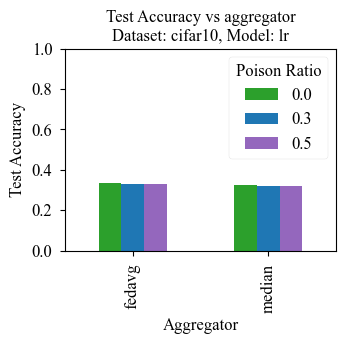

  aggregator  poison_ratio  mean_test_acc       std  qty
0     fedavg           0.0        0.33410  0.021463    5
1     fedavg           0.3        0.32806  0.024355    5
2     fedavg           0.5        0.33198  0.029462    5
3     median           0.0        0.32484  0.022983    5
4     median           0.3        0.32036  0.028292    5
5     median           0.5        0.31960  0.029510    5


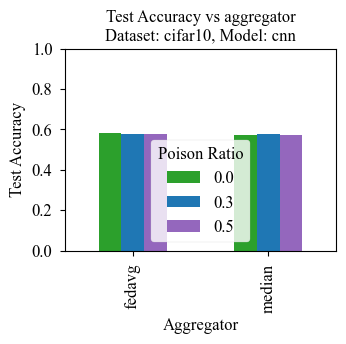

  aggregator  poison_ratio  mean_test_acc       std  qty
0     fedavg           0.0        0.58418  0.008343    5
1     fedavg           0.3        0.57938  0.010034    5
2     fedavg           0.5        0.57556  0.007628    5
3     median           0.0        0.57410  0.005615    5
4     median           0.3        0.57766  0.008158    5
5     median           0.5        0.57004  0.004767    5


In [165]:
dataset = 'cifar10'

for model_type in ['lr', 'cnn']:
    exp5_data = df[df['phase'] == 'exp5_defense_comparison'].copy()
    exp5_data = exp5_data[exp5_data['dataset'] == dataset]
    
    exp5_data = exp5_data[exp5_data['model_type'] == model_type]

    # mean
    mean_test_acc = exp5_data.groupby(['aggregator', 'poison_ratio'])['mean_test_acc'].mean().reset_index()
    mean_test_acc_pivot = mean_test_acc.pivot(index='aggregator', columns='poison_ratio', values='mean_test_acc')
    # std
    std_test_acc = exp5_data.groupby(['aggregator', 'poison_ratio'])['mean_test_acc'].std().reset_index()
    std_test_acc.columns = ['aggregator', 'poison_ratio', 'std']
    mean_std_test_acc = mean_test_acc.merge(std_test_acc, on=['aggregator', 'poison_ratio'])   
    # qty
    count_test_acc = exp5_data.groupby(['aggregator', 'poison_ratio'])['mean_test_acc'].count().reset_index()
    count_test_acc.columns = ['aggregator', 'poison_ratio', 'qty']
    mean_std_qty_test_acc = mean_std_test_acc.merge(count_test_acc, on=['aggregator', 'poison_ratio'])   

    # plot mean_test_acc avg vs fix width 1,4,16,64, color by poison_ratio, save figure Double Column IEEE Format
    colors = ['tab:green', 'tab:blue', 'tab:purple']
    mean_test_acc_pivot.plot(kind='bar', figsize=(8, 6), color=colors)
    plt.ylim(0, 1)
    plt.title(f'Test Accuracy vs aggregator\nDataset: {dataset}, Model: {model_type}')
    plt.xlabel('Aggregator')
    plt.ylabel('Test Accuracy')
    plt.legend(title='Poison Ratio')
    save_ieee_figure(plt.gcf(), 'exp5_defense_comparison_test_acc_model_{}_dataset_{}'.format(model_type, dataset), width=IEEE_SINGLE_COLUMN)
    plt.show()

    # table mean_test_acc avg vs fix width 1,4,16,64, color by poison_ratio and qty  
    print(mean_std_qty_test_acc)

